
# <font color=black> Coberturas Dinámicas </font>
## <font color=black> Problemas de Riesgo en Sistemas de Trading </font>

<p style='text-align: justify;'> El principal objetivo es un sistema de trading es maximizar sus beneficios utilizando de señales y confirmación de tendencias que deberían de ayudar a mejorar el procentaje de entradas y salidas apropiadas. Sin embargo, con el fin de disminuir la minusvalía de la posiciones abiertas se propone el uso de opciones vanilla como una alternativa para controlar el riesgo. Es ahí en donde el swing trading y las opciones son un vehículo, ya que se combinan para crear un sistema que funcion de la mejor manera posible.</p>




## 1.0 Prima de una opción

Los siguientes tres conceptos son escenciales para comprender que compone el valor de una prima:

> I) Valor Intrínsico
    Sucede solo cuando la opción esta en el dinero
  
> II) Valor Extrínsico
    Refleja cambios en la volatilidad, a mayor volatilidad mayor prima y viceversa
    
> III) Time-Decay
    Conforme se acerca el vencimiento el valor de la opción se vuelve cero

## 2.0 Criterio para la selección de opciones
### *Long-Option, una solución simple*

    Las opciones largas son altamente apalancadas y de riesgo limitado. Pero tambien tienen ciertas desventajas como el que pierden rápidamente su valor conforme se acerca el tiempo de vencimiento. 
 ---

    Hay tres criterios de ayuda para elegir la mejor opción de compra que hacen sentido por la siguiente manera:

     1. Seleccionar una opción con un ciclo de vida corto

     2. Elegir un strike cercano en el dinero ATM o strikes un punto o menos ITM

    3. El tiempo de compra/venta está basado en indicadores y confirmaciones de cambio de tendencia (Tendencia, TP, STP y breakeven)

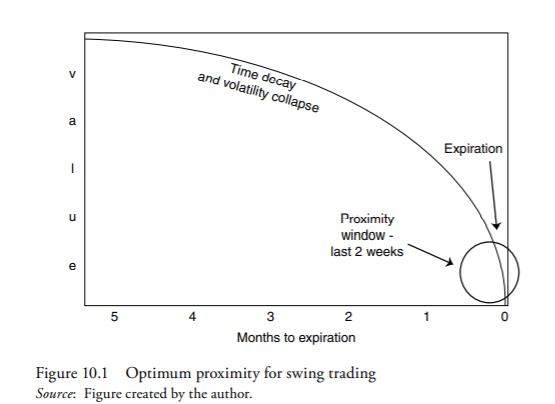

    La posición larga ideal objetivo se encuentra en el máximo o mínimo de la tendencia actual a corto plazo donde, 

    - compra de un call en el mínimo de una tendencia bajista
    - compra de un put en el máximo de una tendencia alcista
    
    Si este momento es efectivo, las ganancias son posibles en un tiempo de respuesta muy rápido.

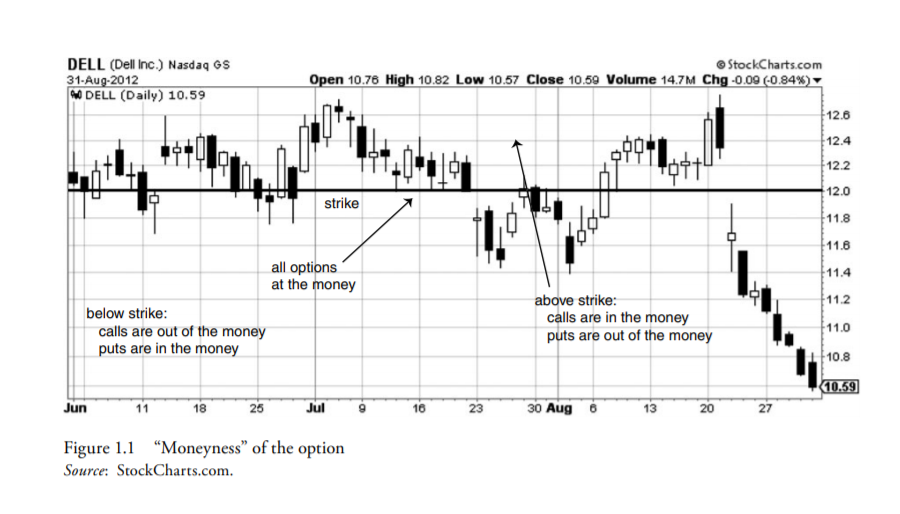

## 3.0 Información y parámetros para las opciones 

### 3.1 QuikStrike CME
    Plataforma gratuita la cual muestra información relevante respecto a las opciones disponibles: 
        - https://cmegroup-sso.quikstrike.net

### 3.2 Contrato y especificaciones 

        Subyacente
            EUR/USD - FX Futures Mini
            
        Tipos de opciones
            Weekly Monday, Wednesday, Friday & monthly 

        Unidades por contrato
            125,000€

        Mínima fluctuación 
            0.0001€ =  12.50 

        Horarios de trading
            Domingo 17:00 a Viernes 16:00

          Ejercicio
               ITM automático y OTM expira sin valor

### 3.2.1 Opciones semanales

    Las opciones disponibles en el CME manejan las siguientes periocidades, las cuales serán de gran utilidad para proponer el sistema de cobertura adecuado:

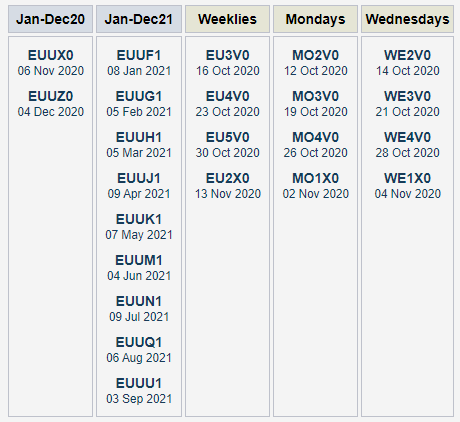

    Esta es una implementación es semiautomatizada, ya que para contar con la información real y al momento sería necesario pagar una suscripción para tener acceso a la API. 

    Los que los datos utilizados corresponden al día 11 de octubre del 2020

    Los archivos y documentación del proyecto se encuentran disponibles en la siguiente liga: 
- https://drive.google.com/drive/folders/1LADnSw4X0KpZ0MXHuOqR7KiLpKe9JBQj?usp=sharing

### 4.0 Implementación

In [2]:
# Liberías
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import time
import matplotlib.dates as mpl_dates
import pandas_datareader.data as web
from calcbsimpvol import calcbsimpvol

%matplotlib inline
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)
import scipy.stats as si
import sympy as sy
from sympy.stats import Normal, cdf
from sympy import init_printing
init_printing()

In [3]:
# Display dataframe
def displaydf(dataframe, cols = None, rows = 20):
    with pd.option_context("display.max_columns", cols):
        with pd.option_context("display.max_rows", rows):
            display(dataframe)
    return True

# P&L 
def payout_(position, spot, strike):
    if position=="buy":
        payout = (spot-strike) 
    else:
        payout = (strike-spot)  
    return payout

# Cobertura
def strategy(position):
    def vanilla_opt(position: str):
        if position =="buy":
            vanilla = "put"
            return vanilla
        elif position =="sell":
            vanilla ="call"
            return vanilla 
    hedging = "long"
    vanilla=vanilla_opt(position)
    return hedging, vanilla  

### 4.1 Parámetros iniciales

In [4]:
# Activo a invertir (ticker)
asset = "M6E=F"  #EUR-USD Futuros Mini CME

# Monto de la inversión
balance = 100000

# Compra ó venta, basado en las señales del modelo
position="sell"

# Fecha de entrada
T1= "2020-10-25"

#Fecha de salida
T2= '2020-10-31'

# Estrategia
options = strategy(position)
vanilla = options[1]

print("¿Qué productos necesito comprar?",options)

¿Qué productos necesito comprar? ('long', 'call')


### 4.2 Información histórica

In [5]:
# Descargar de los precios de ajuste cerrados. Fuente: Yahoo Finance
def get_adj_closes(tickers, start_date=None, end_date=None):
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    closes = closes['Adj Close']
    closes.sort_index(inplace=True)
    return closes

start_date = T1
end_date =  T2 
closes = get_adj_closes([asset], start_date, end_date)
closes_asset = closes.loc[:,asset]
S0 = closes_asset.iloc[0] #Último precio
closes_df = pd.DataFrame(closes_asset) #Dataframe escenario 1
closes_df_1 = pd.DataFrame(closes_asset) #Dataframe escenario 2

    #Gráfica de precios
    #plt.figure(figsize=(20, 5))
    #ax=plt.axes()
    #ax.spines["right"].set_visible(False)
    #ax.spines["left"].set_visible(False)
    #ax.spines["bottom"].set_visible(False)
    #ax.spines["top"].set_visible(False)
    #closes_asset.plot() 
    #plt.title("EUR-USD Futures CME",fontsize=20)
    #plt.xlabel('Días', fontsize=10)
    #plt.ylabel('Precio $',fontsize=10)
closes_df

,M6E=F
Date,
2020-10-26,1.183
2020-10-27,1.183
2020-10-28,1.176
2020-10-29,1.168
2020-10-30,1.166


### 4.3 Black-Scholes para opciones vanilla europeas

In [6]:
#S: spot
#K: strike
#T: time
#r: rate
# sigma: vol

#Primas 
def euro_vanilla(S, K, T, r, sigma, option = vanilla):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if option == 'call':
        result = (S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    if option == 'put':
        result = (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * si.norm.cdf(-d1, 0.0, 1.0))
    return result

#Deltas 
def delta(S, K, T, r, sigma, option = vanilla):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T)) 
    if option == 'call':
        result = si.norm.cdf(d1, 0.0, 1.0)
    if option == 'put':
        result = -si.norm.cdf(-d1, 0.0, 1.0)     
    return result

### 4.4 Inicialización de la cobertura

In [7]:
# Importar los datos
CME_Opt = pd.read_csv(r"C:\Users\Andrea\Documents\Universidad\ITESO\PAP\PAP I\Opciones EUR-USD CME.csv")

In [12]:
#Unidades por contrato
size_opt= 125000 
size_fut = 62500 

#Contratos futuros
future=round(balance/S0,2) #Tipo de cambio
future_num = round(future/size_fut,0) #Número de contratos

#Margen mantenimiento +10% = margen inicial
margin_mant = 1450 
margin_init = margin_mant*1.1 #1590

#Contratos de opciones 
opt_num = round(future/size_opt,0) 

#Mínima fluctuacion
tick_size = 0.0001
tick_usd_fut = 6.25

#Fluctuación máxima para mantener el margen
mant = round((margin_mant/tick_usd_fut)*tick_size,2)

### 4.5 Simulación
### 4.5.1 Escenario #1: sell, long call

In [9]:
#Opción ITM = posición de entrada
S = closes_asset.iloc[0] 
K = S 
r = 0.008 

#Filtrar opción menor o igual al precio de entrada
opt_type =CME_Opt.loc[(CME_Opt.STRIKE>=S) & (CME_Opt.EXPIRATION>=T2)]

#Seleccionar strike
strike_min = min(opt_type["STRIKE"])

#Seleccionar vencimiento
excercice_min = min(opt_type["EXPIRATION"])

#Opción 
option = CME_Opt.loc[(CME_Opt.STRIKE==strike_min) & (CME_Opt.EXPIRATION==excercice_min)]

#Prima
prime = min(option[vanilla.upper()])

#Volatilidad
sigma = float(option["VOLATILITY"])/100

#Tipo de Opción
contract_type = option["CODE"]

displaydf(option)

,VOLATILITY,DELTA,CALL SETTLE,CALL,STRIKE,PUT,PUT SETTLE,DELTA.1,STRADDLE,GAMMA,VEGA,THETA,CODE,EXPIRATION
337,5.94,48,0.007,0.006,1.185,0.007,0.008,-52,0.014,22.818,0.001,-2.000e-04,MO1X0,2020-11-02


True

In [10]:
t = 7/252
prime_bs = round(euro_vanilla(S, K, t, r, sigma, option= vanilla),3)+0.002
prime_bs

In [11]:
#Vectores
long = len(closes_df)
zeros = pd.Series(np.zeros(long))
strikev = pd.Series(np.ones(long) * K)
timev = pd.Series(np.array([7/252,6/252,5/252,4/252,3/252]))
ratev = pd.Series(np.ones(long) * r)
sigmav = pd.Series(np.ones(long) * sigma)

# DataFrame
closes_df["Delta"] = delta(closes_asset.values, strikev, timev, ratev, sigmav)
closes_df["Prima"] = euro_vanilla(closes_asset.values, strikev, timev, ratev, sigmav, option = vanilla).values+.002
closes_df["Prima $ (A)"] = closes_df["Prima"]*size_opt*opt_num*-1
closes_df["P&L futuros (B)"] = ((payout_(position, closes_asset.values,strikev).values)/tick_size)*tick_usd_fut*future_num
closes_df["(A) + (B)"] = closes_df["P&L futuros (B)"] +closes_df["Prima $ (A)"]
closes_df["Balance con cobertura"] = balance+closes_df["(A) + (B)"]
closes_df["Balance sin cobertura"] = balance+closes_df["P&L futuros (B)"]
closes_df["P&L% con cobertura (C)"] = ((closes_df["Balance con cobertura"]-balance)/balance)*100
closes_df["P&L% sin cobertura (D)"] = ((closes_df["Balance sin cobertura"]-balance)/balance)*100
#closes_df["(C) / (D)"] = round(closes_df["P&L% sin cobertura (D)"]/closes_df["P&L% con cobertura (C)"],2)

NameError: name 'size_opt' is not defined

In [16]:
displaydf(closes_df)

,M6E=F,Delta,Prima,Prima $ (A),P&L futuros (B),(A) + (B),Balance con cobertura,Balance sin cobertura,P&L% con cobertura (C),P&L% sin cobertura (D)
Date,,,,,,,,,,
2020-10-26,1.183,0.511,0.007,-850.342,0.000,-850.342,99149.658,100000.000,-0.850,0.000
2020-10-27,1.183,0.506,0.006,-798.316,6.251,-792.065,99207.935,100006.251,-0.792,0.006
2020-10-28,1.176,0.269,0.004,-451.557,393.748,-57.808,99942.192,100393.748,-0.058,0.394
2020-10-29,1.168,0.053,0.002,-274.367,900.000,625.634,100625.634,100900.000,0.626,0.900
2020-10-30,1.166,0.013,0.002,-254.234,1068.749,814.515,100814.515,101068.749,0.815,1.069


True

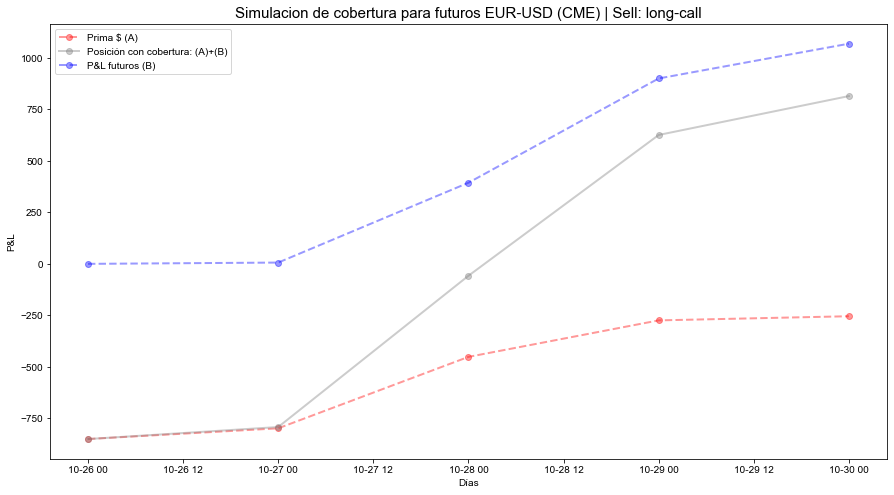

In [17]:
#Gráfica
plt.figure(figsize=(15,8))
ax=plt.axes()
plt.plot(closes_df["Prima $ (A)"], lw=2,color="red",linestyle="--", label='Prima $ (A)', marker='o', alpha=0.4)
plt.plot(closes_df["(A) + (B)"], lw=2,color="grey", label='Posición con cobertura: (A)+(B)', marker='o', alpha=0.4)
plt.plot(closes_df["P&L futuros (B)"], lw=2, color="blue",linestyle="--",label='P&L futuros (B)', marker='o', alpha=0.4)
plt.legend(loc='best', fontsize=10)
plt.title("Simulacion de cobertura para futuros EUR-USD (CME) | Sell: long-call",fontsize=15)
plt.xlabel('Días', fontsize=10)
plt.ylabel('P&L',fontsize=10)
plt.style.use("seaborn-darkgrid")
blue, = sns.color_palette("muted", 1)

In [18]:
umbral = ((prime*size_opt)/tick_usd_fut)*tick_size
S0-round(umbral,4)

### 4.5.2 Escenario #2: buy, long put

In [19]:
# Compra ó venta, basado en las señales del modelo
position="buy"

#Estrategia
options = strategy(position)
vanilla = options[1]
print("¿Qué productos necesito comprar?",options)

¿Qué productos necesito comprar? ('long', 'put')


In [20]:
#Filtrar opción menor o igual al precio de entrada
opt_type =CME_Opt.loc[(CME_Opt.STRIKE>=S) & (CME_Opt.EXPIRATION>=T2)]

#Seleccionar strike
strike_min = min(opt_type["STRIKE"])

#Seleccionar vencimiento
excercice_min = min(opt_type["EXPIRATION"])

#Opción 
option = CME_Opt.loc[(CME_Opt.STRIKE==strike_min) & (CME_Opt.EXPIRATION==excercice_min)]

#Prima
prime = min(option[vanilla.upper()])

#Volatilidad
sigma = float(option["VOLATILITY"])/100

#Tipo de Opción
contract_type = option["CODE"]

displaydf(option)

,VOLATILITY,DELTA,CALL SETTLE,CALL,STRIKE,PUT,PUT SETTLE,DELTA.1,STRADDLE,GAMMA,VEGA,THETA,CODE,EXPIRATION
337,5.94,48,0.007,0.006,1.185,0.007,0.008,-52,0.014,22.818,0.001,-2.000e-04,MO1X0,2020-11-02


True

In [21]:
t = 7/252
round(euro_vanilla(S, K, t, r, sigma, option = vanilla)+.0035,4)

In [22]:
# Vectores
long = len(closes_df)
zeros = pd.Series(np.zeros(long))
strikev = pd.Series(np.ones(long) * K)
timev = pd.Series(np.array([7/252,6/252,5/252,4/252,3/252]))
ratev = pd.Series(np.ones(long) * r)
sigmav = pd.Series(np.ones(long) * sigma)

# Dataframe
closes_df_1["Delta"] = delta(closes_asset.values, strikev, timev, ratev, sigmav, option=vanilla)
closes_df_1["Prima"] = euro_vanilla(closes_asset.values, strikev, timev, ratev, sigmav, option = vanilla).values+.0035
closes_df_1["Prima $ (A)"] = closes_df_1["Prima"]*size_opt*opt_num
closes_df_1["P&L futuros (B)"] = ((payout_(position, closes_asset.values,strikev).values)/tick_size)*tick_usd_fut*future_num
closes_df_1["(A) + (B)"] = closes_df_1["P&L futuros (B)"] +closes_df_1["Prima $ (A)"]
closes_df_1["Balance con cobertura"] = balance+closes_df_1["(A) + (B)"]
closes_df_1["Balance sin cobertura"] = balance+closes_df_1["P&L futuros (B)"]
closes_df_1["P&L% con cobertura (C)"] = ((closes_df_1["Balance con cobertura"]-balance)/balance)*100
closes_df_1["P&L% sin cobertura (D)"] = ((closes_df_1["Balance sin cobertura"]-balance)/balance)*100
#closes_df_1["(C) / (D)"] = round(closes_df_1["P&L% sin cobertura (D)"]/closes_df_1["P&L% con cobertura (C)"],2)

,M6E=F,Delta,Prima,Prima $ (A),P&L futuros (B),(A) + (B),Balance con cobertura,Balance sin cobertura,P&L% con cobertura (C),P&L% sin cobertura (D)
Date,,,,,,,,,,
2020-10-26,1.183,-0.489,0.008,1004.996,0.000,1004.996,101004.996,100000.000,1.005,0.000
2020-10-27,1.183,-0.494,0.008,970.164,-6.251,963.913,100963.913,99993.749,0.964,-0.006
2020-10-28,1.176,-0.731,0.011,1403.091,-393.748,1009.343,101009.343,99606.252,1.009,-0.394
2020-10-29,1.168,-0.947,0.018,2243.097,-900.000,1343.097,101343.097,99100.000,1.343,-0.900
2020-10-30,1.166,-0.987,0.021,2565.153,-1068.749,1496.404,101496.404,98931.251,1.496,-1.069


True

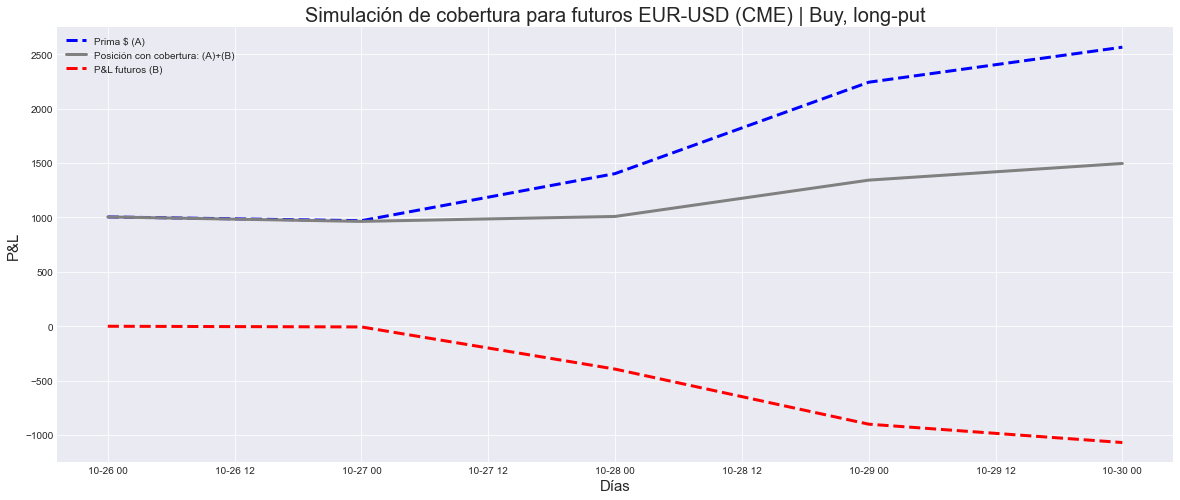

In [26]:
#Gráfica
plt.figure(figsize=(20,8))
ax=plt.axes()
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.plot(closes_df_1["Prima $ (A)"], lw=3,color="blue",linestyle="--", label='Prima $ (A)')
plt.plot(closes_df_1["(A) + (B)"], lw=3,color="grey", label='Posición con cobertura: (A)+(B)')
plt.plot(closes_df_1["P&L futuros (B)"], lw=3, color="red",linestyle="--",label='P&L futuros (B)')
plt.legend(loc='best', fontsize=10)
plt.title("Simulación de cobertura para futuros EUR-USD (CME) | Buy, long-put",fontsize=20)
plt.xlabel('Días', fontsize=15)
plt.ylabel('P&L',fontsize=15)
displaydf(closes_df_1)

In [23]:
umbral = ((prime*size_opt)/tick_usd_fut)*tick_size
take_profit = S0+round(umbral,4)
stop_loss = S0-round(umbral,4)
take_profit, stop_loss

### 5.0 Resultados y análisis

### 5.1.1 Con cobertura

Text(0, 0.5, 'P&L')

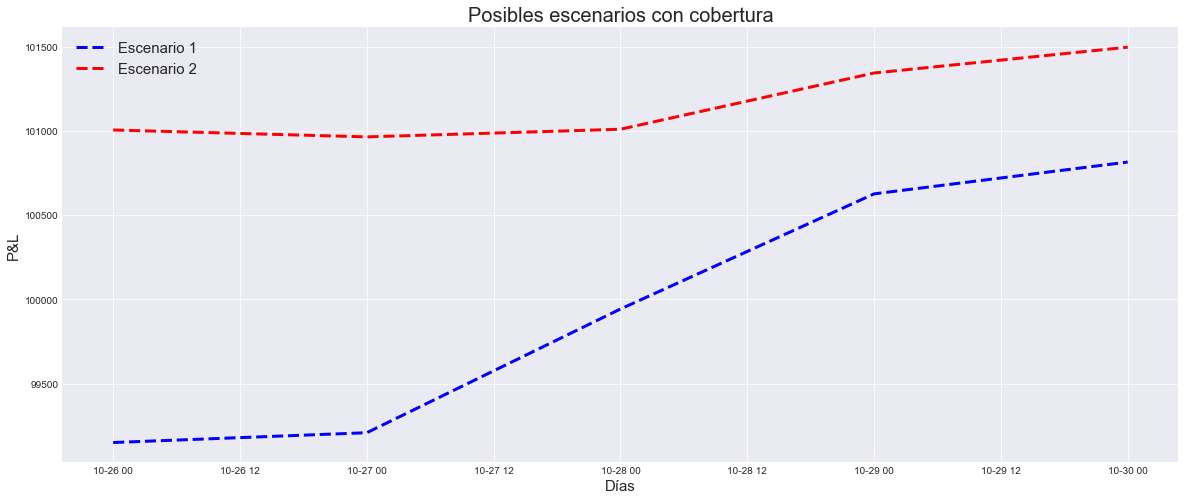

In [24]:
#Gráfica
plt.figure(figsize=(20,8))
ax=plt.axes()
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.plot(closes_df["Balance con cobertura"], lw=3,color="blue",linestyle="--", label='Escenario 1')
plt.plot(closes_df_1["Balance con cobertura"], lw=3,color="red",linestyle="--", label='Escenario 2')
plt.legend(loc='best', fontsize=15)
plt.title("Posibles escenarios con cobertura",fontsize=20)
plt.xlabel('Días', fontsize=15)
plt.ylabel('P&L',fontsize=15)

### 5.5.2 Sin cobertura

Text(0, 0.5, 'P&L')

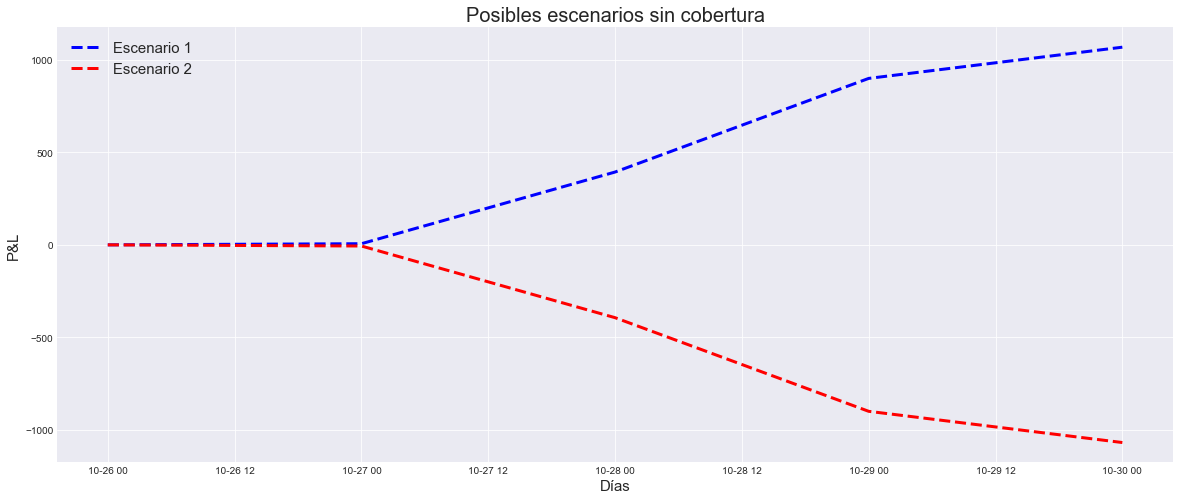

In [25]:
#Gráfica
plt.figure(figsize=(20,8))
ax=plt.axes()
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.plot(closes_df["P&L futuros (B)"], lw=3,color="blue",linestyle="--", label='Escenario 1')
plt.plot(closes_df_1["P&L futuros (B)"], lw=3,color="red",linestyle="--", label='Escenario 2')
plt.legend(loc='best', fontsize=15)
plt.title("Posibles escenarios sin cobertura",fontsize=20)
plt.xlabel('Días', fontsize=15)
plt.ylabel('P&L',fontsize=15)